In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## Set Up

In [3]:
# Prompt the user to paste the URL
# text = input("Please paste the IMDb URL: ")
#text = "https://www.imdb.com/title/tt14674086/"

text = "https://www.imdb.com/title/tt0472954/"

# Use a regular expression to extract the IMDb ID
pattern = r'tt\d+'
match = re.search(pattern, text)

if match:
    section = match.group(0)
    print(f"Extracted IMDb ID: {section}")

Extracted IMDb ID: tt0472954


In [4]:
df = pd.read_csv('../data/organized_imdb_dataset.csv') #load the data
print(df.head())

  episode_id    show_id  season  episode  rating  votes  \
0  tt0041951  tt0041038     1.0      9.0     7.6     90   
1  tt0635319  tt0041038     4.0     13.0     8.4     44   
2  tt0635320  tt0041038     5.0     21.0     8.9     47   
3  tt0635321  tt0041038     1.0     41.0     7.7     63   
4  tt0635322  tt0041038     3.0     27.0     7.6     37   

              episode_title is_adult    year  runtime_minutes    genre  \
0            The Tenderfeet    False  1949.0             30.0  Western   
1            A Broken Match    False  1954.0             23.0  Western   
2         A Harp for Hannah    False  1957.0             23.0  Western   
3       A Pardon for Curley    False  1950.0             23.0  Western   
4  A Stage for Mademoiselle    False  1953.0             23.0  Western   

        show_title  
0  The Lone Ranger  
1  The Lone Ranger  
2  The Lone Ranger  
3  The Lone Ranger  
4  The Lone Ranger  


/var/folders/rm/dnyhsnfd6ll4tl6sg03cj7t80000gn/T/ipykernel_74358/3952376479.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/organized_imdb_dataset.csv') #load the data


In [5]:
df_new = df.copy()

# Convert the data types of the columns to the correct data type
df_new['episode_id'] = df_new['episode_id'].astype(str)
df_new['show_id'] = df_new['show_id'].astype(str)
df_new['episode_title'] = df_new['episode_title'].astype(str)  
df_new['show_title'] = df_new['show_title'].astype(str)

# Convert to numeric and handle NaN values
df_new['season'] = pd.to_numeric(df_new['season'], errors='coerce').fillna(pd.NA).astype('Int64')
df_new['episode'] = pd.to_numeric(df_new['episode'], errors='coerce').fillna(pd.NA).astype('Int64')
df_new['votes'] = pd.to_numeric(df_new['votes'], errors='coerce').fillna(pd.NA).astype('Int64')
df_new['runtime_minutes'] = pd.to_numeric(df_new['runtime_minutes'], errors='coerce').fillna(pd.NA).astype('Int64')
df_new['rating'] = pd.to_numeric(df_new['rating'], errors='coerce').fillna(pd.NA).astype(float)
df_new['year'] = pd.to_numeric(df_new['year'], errors='coerce').fillna(pd.NA).astype('Int64')

# Handle non-boolean values in 'is_adult' and convert to boolean
df_new.loc[~df_new['is_adult'].isin([0, 1]), 'is_adult'] = pd.NA
df_new['is_adult'] = df_new['is_adult'].astype('boolean')

# Filter the DataFrame based on the desired section (show_id)
tvshow_df = df_new[df_new['show_id'] == section]
# Sort the DataFrame by season and episode
tvshow_df_sorted = tvshow_df.sort_values(by=['season', 'episode']).reset_index(drop=True)

# Display the filtered DataFrame
tvshow_df_sorted.head()

,episode_id,show_id,season,episode,rating,votes,episode_title,is_adult,year,runtime_minutes,genre,show_title
0,tt0612823,tt0472954,1,1,8.1,5202,The Gang Gets Racist,False,2005,22,Comedy,It's Always Sunny in Philadelphia
1,tt0612820,tt0472954,1,2,8.2,4617,Charlie Wants an Abortion,False,2005,22,Comedy,It's Always Sunny in Philadelphia
2,tt0612824,tt0472954,1,3,8.2,4515,Underage Drinking: A National Concern,False,2005,22,Comedy,It's Always Sunny in Philadelphia
3,tt0612819,tt0472954,1,4,8.0,4184,Charlie Has Cancer,False,2005,23,Comedy,It's Always Sunny in Philadelphia
4,tt0612822,tt0472954,1,5,7.8,3973,Gun Fever,False,2005,21,Comedy,It's Always Sunny in Philadelphia


In [6]:
# Sample show_title value from tvshow_df (use the appropriate method to get the actual title)
show_title = tvshow_df['show_title'].iloc[0]

# Create a sanitized filename from show_title
csv_filename = show_title.lower().replace(' ', '_') + '.csv'
heatmap_filename = 'heatmap_' + show_title.lower().replace(' ', '_') + '.png'
scatterplot_filename = 'scatterplot_' + show_title.lower().replace(' ', '_') + '.png'

# Construct the path to the data folder and output folder outside the notebooks folder
data_folder = os.path.join('..', 'data')
output_folder = os.path.join('..', 'output')
os.makedirs(output_folder, exist_ok=True)
os.makedirs(data_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)

print(show_title)
print(csv_filename)
print(heatmap_filename)
print(scatterplot_filename)
print(data_folder)
print(output_folder)

It's Always Sunny in Philadelphia
it's_always_sunny_in_philadelphia.csv
heatmap_it's_always_sunny_in_philadelphia.png
scatterplot_it's_always_sunny_in_philadelphia.png
../data
../output


## Data Visualization

We will visualize the data to identify patterns, trends, and outliers using various plots and charts.

Heatmap saved to ../output/heatmap_it's_always_sunny_in_philadelphia.png


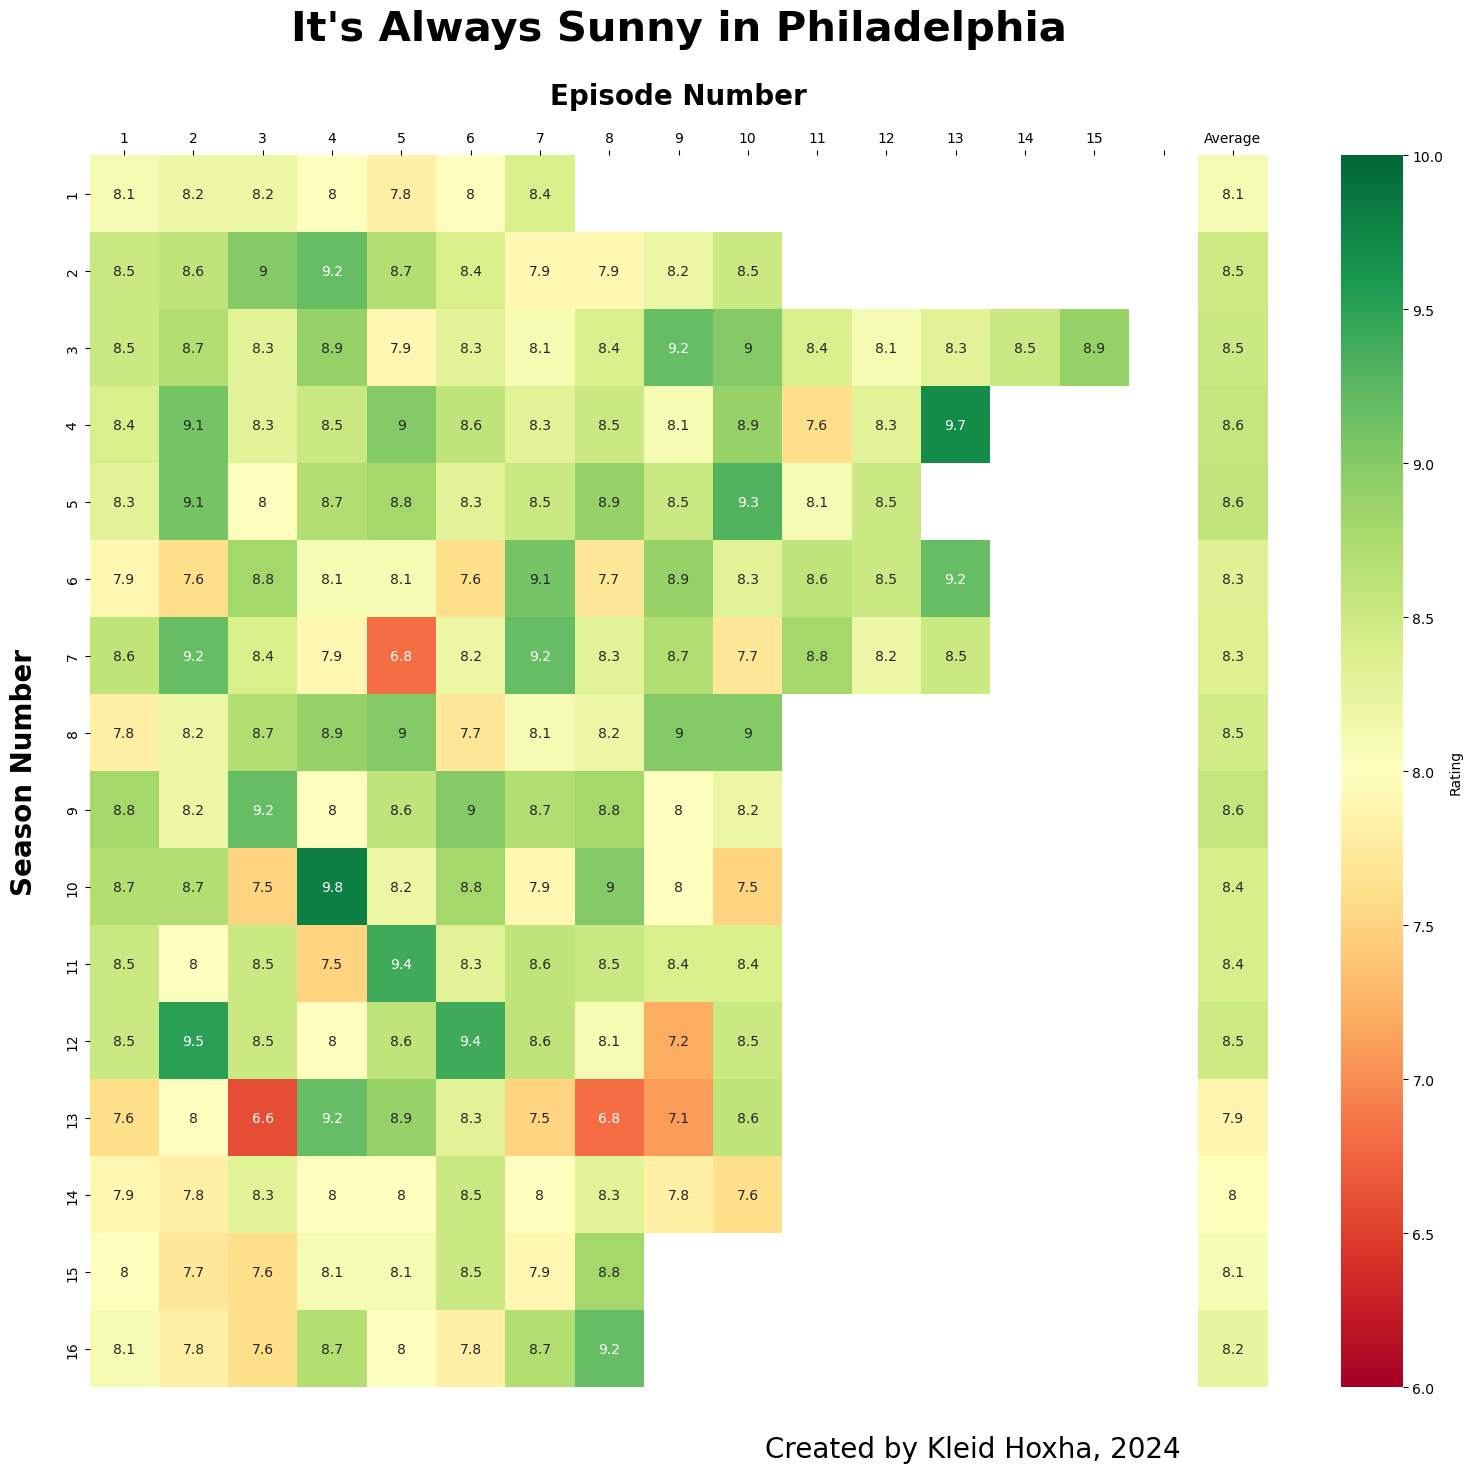

In [17]:
# Define the uniform color limits
vmin = 6.0 # bottom 10% of the ratings
vmax = 10.0

# Drop rows with NA values in 'season' or 'episode' columns and create the pivot table
pivot_table = tvshow_df_sorted.dropna(subset=['season', 'episode']).pivot("season", "episode", "rating")

# Calculate the average rating per season
average_ratings = pivot_table.mean(axis=1)

# Add a NaN column for spacing
pivot_table[' '] = np.nan

# Add the average ratings as a new column
pivot_table['Average'] = average_ratings

# Reorder columns to place the empty column before the 'Average' column
columns_order = list(pivot_table.columns[:-2]) + [' ', 'Average']
pivot_table = pivot_table[columns_order]

# Mask the NA values
mask = pivot_table.isna()

# Calculate the number of seasons and episodes
num_seasons = pivot_table.shape[0]
num_episodes = pivot_table.shape[1]

# Define the size of each square (e.g., 1 unit per episode)
square_size = 1

# Calculate the figure size
fig_width = (num_episodes + 2) * square_size  # +2 for the new columns (space and 'T')
fig_height = num_seasons * square_size

# Plot the heatmap
plt.figure(figsize=(fig_width, fig_height))

# Create a heatmap with the additional column
sns.heatmap(pivot_table, annot=True, cmap="RdYlGn", vmin=vmin, vmax=vmax, cbar_kws={'label': 'Rating'}, mask=mask)

# Customize the plot
plt.title(tvshow_df_sorted['show_title'].iloc[0], fontsize=30, fontweight='bold', pad=30)
plt.xlabel('Episode Number', fontsize=20, fontweight='bold', labelpad=20)
plt.ylabel('Season Number', fontsize=20, fontweight='bold', labelpad=20)

# Move the x-axis labels to the top
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Add author credit
plt.text(0.75, -0.05, 'Created by Kleid Hoxha, 2024', ha='center', va='center', transform=plt.gca().transAxes, fontsize=20)

# Save the heatmap as a PNG file in the output folder
heatmap_file_path = os.path.join(output_folder, heatmap_filename)
plt.savefig(heatmap_file_path, bbox_inches='tight')
print(f"Heatmap saved to {heatmap_file_path}")


plt.show()

In [19]:
df_sorted = tvshow_df_sorted.copy().dropna(subset=['season', 'episode'])

# Initialize the compound_episode column
df_sorted['compound_episode'] = 0

# Keep track of the last episode number
last_episode = 0

# Calculate the compound episode number
for season in df_sorted['season'].unique():
    season_episodes = df_sorted[df_sorted['season'] == season]
    df_sorted.loc[season_episodes.index, 'compound_episode'] = season_episodes['episode'] + last_episode
    last_episode += season_episodes['episode'].max()

# Display the updated DataFrame
df_sorted.head()

,episode_id,show_id,season,episode,rating,votes,episode_title,is_adult,year,runtime_minutes,genre,show_title,compound_episode
0,tt0612823,tt0472954,1,1,8.1,5202,The Gang Gets Racist,False,2005,22,Comedy,It's Always Sunny in Philadelphia,1
1,tt0612820,tt0472954,1,2,8.2,4617,Charlie Wants an Abortion,False,2005,22,Comedy,It's Always Sunny in Philadelphia,2
2,tt0612824,tt0472954,1,3,8.2,4515,Underage Drinking: A National Concern,False,2005,22,Comedy,It's Always Sunny in Philadelphia,3
3,tt0612819,tt0472954,1,4,8.0,4184,Charlie Has Cancer,False,2005,23,Comedy,It's Always Sunny in Philadelphia,4
4,tt0612822,tt0472954,1,5,7.8,3973,Gun Fever,False,2005,21,Comedy,It's Always Sunny in Philadelphia,5


Scatter plot saved to ../output/scatterplot_it's_always_sunny_in_philadelphia.png


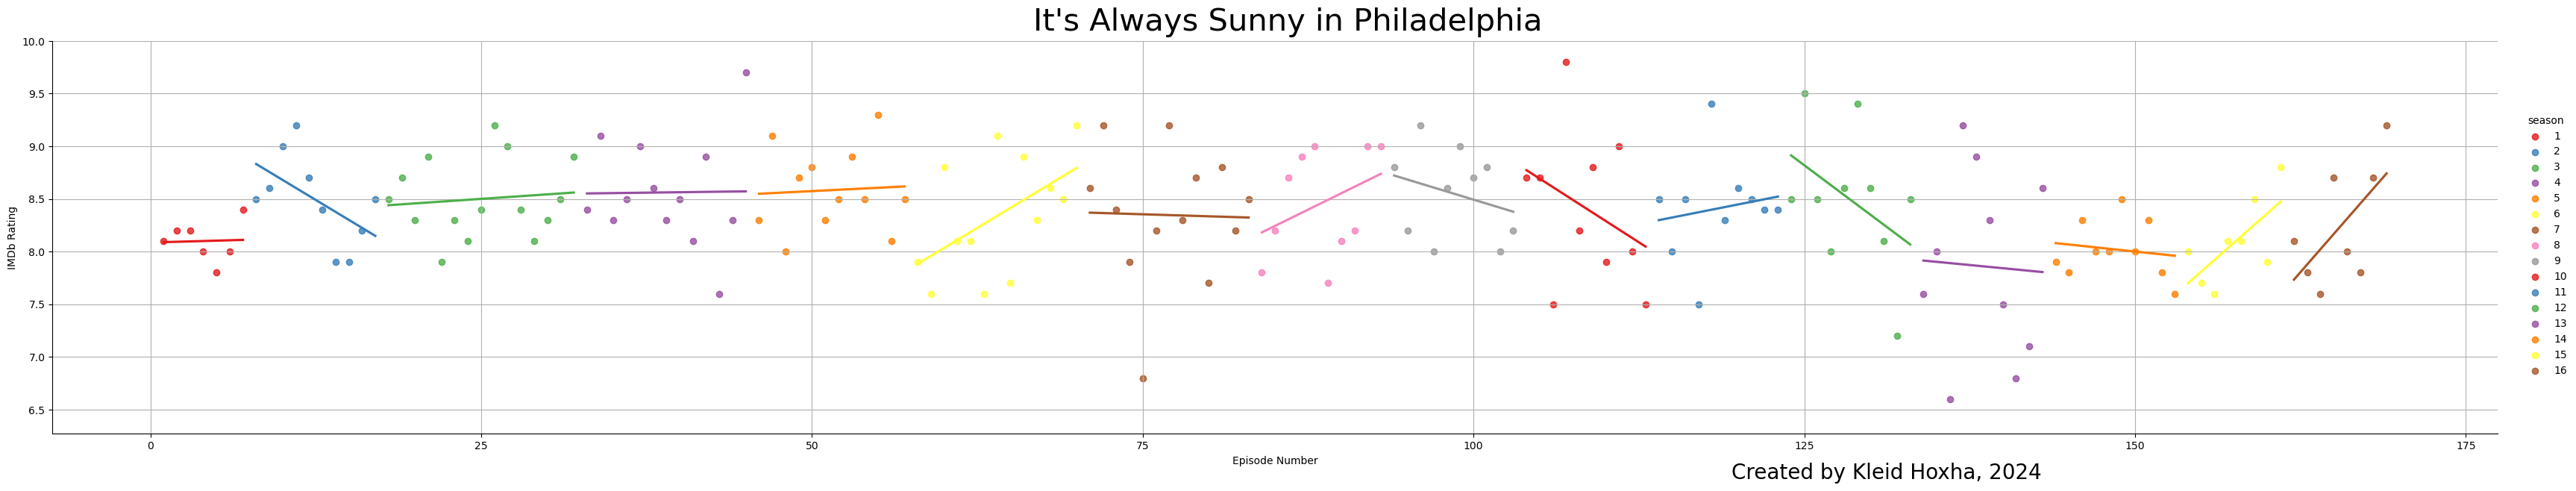

In [22]:
# Ensure 'season' is of type int
df_sorted['season'] = df_sorted['season'].astype(int)

# Calculate the number of compound episodes
num_compound_episodes = df_sorted['compound_episode'].max()

# Set the figure width dynamically based on the number of compound episodes
fig_width = num_compound_episodes / 5  # Adjust the divisor to get the desired width

# Create the scatter plot with lines of best fit for each season
g = sns.lmplot(data=df_sorted, x='compound_episode', y='rating', hue='season', palette='Set1', ci=None, aspect=fig_width/6, height=6)

# Customize the plot
g.fig.suptitle(tvshow_df_sorted['show_title'].iloc[0], fontsize=30, y=1.05)
g.set_axis_labels('Episode Number', 'IMDb Rating')
g.set(ylim=((df_sorted['rating'].min()) * 0.95, 10))
plt.grid(True)

# Add author credit
plt.text(0.75, -0.1, 'Created by Kleid Hoxha, 2024', ha='center', va='center', transform=plt.gca().transAxes, fontsize=20)

# Save the plot as a PNG file in the output folder
scatterplot_file_path = os.path.join(output_folder, scatterplot_filename)
g.savefig(scatterplot_file_path, bbox_inches='tight')
print(f"Scatter plot saved to {scatterplot_file_path}")

# Show the plot
plt.show()

In [83]:
# Export tvshow_df as a CSV file into the data folder
csv_file_path = os.path.join(data_folder, csv_filename)
tvshow_df.to_csv(csv_file_path, index=False)
print(f"CSV file saved to {csv_file_path}")


CSV file saved to ../data/it's_always_sunny_in_philadelphia.csv
